<a href="https://colab.research.google.com/github/snehakap/Face-Detection-and-Blurring/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

In [ ]:
!pip install opencv-python

1/1 [==============================] - 0s 143ms/step


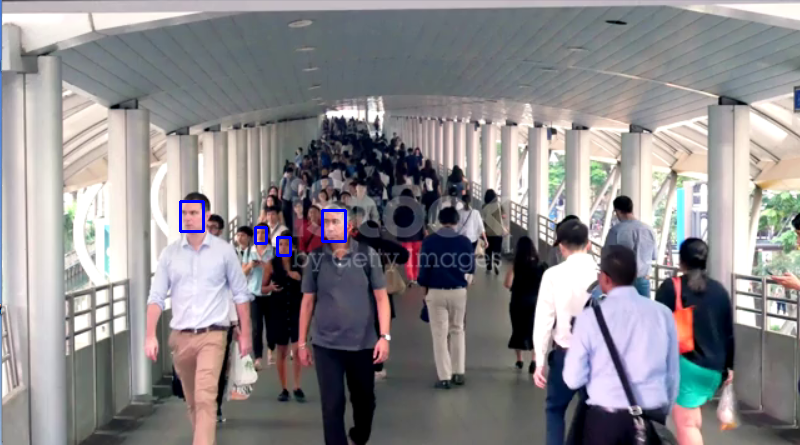

In [ ]:
import cv2
from mtcnn.mtcnn import MTCNN

# Initialize MTCNN detector
detector = MTCNN()

img = cv2.imread("/content/Screenshot 2024-06-28 125657.png")

# Convert the image to RGB (MTCNN expects RGB images)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Getting detections
detections = detector.detect_faces(img_rgb)

# Draw rectangles around detected faces
for detection in detections:
    x, y, width, height = detection['box']
    cv2.rectangle(img, (x, y), (x+width, y+height), (255, 0, 0), 2)

# Show the output
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from mtcnn.mtcnn import MTCNN

# Initialize MTCNN detector
detector = MTCNN()

# Open the input video
input_video_path = "/content/istockphoto-1215499302-640_adpp_is.mp4"
output_video_path = "output_video.mp4"

cap = cv2.VideoCapture(input_video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('outputnew.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Finished processing all frames.")
        break

    # Convert the frame to RGB (MTCNN expects RGB images)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Getting detections
    detections = detector.detect_faces(frame_rgb)

    # Blur detected faces
    for detection in detections:
        x, y, width, height = detection['box']
        x, y = max(0, x), max(0, y)  # Ensure coordinates are non-negative
        face = frame[y:y+height, x:x+width]
        blurred_face = cv2.GaussianBlur(face, (99, 99), 30)
        frame[y:y+height, x:x+width] = blurred_face

    # Write the frame to the output video
    out.write(frame)

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


2/2 [==============================] - 0s 12ms/step
Finished processing all frames.
